<a href="https://colab.research.google.com/github/ShourovyAkter/Assingment-of-Machine-Learning/blob/main/Decision__Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data/car_evaluation.csv')

In [4]:
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [5]:
df.shape

(1728, 7)

In [6]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns=col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for cols in col_names:
  print(df[cols].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [10]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [11]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [12]:
x = df.drop(['class'],axis=1)
y = df['class']

In [13]:
x

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [14]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [15]:
x_train.shape,x_test.shape

((1157, 6), (571, 6))

In [16]:
x_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [17]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [18]:
y_train.head()

48      unacc
468     unacc
155     unacc
1721     good
1208    unacc
Name: class, dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder
Le_x = LabelEncoder()
x_train = x_train.apply(LabelEncoder().fit_transform)
x_test = x_test.apply(LabelEncoder().fit_transform)

In [20]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,3,3,1,2,1,1
468,0,3,1,1,2,1
155,3,0,1,2,2,0
1721,1,1,3,2,2,0
1208,2,1,0,2,2,0


In [21]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,0,0,2,0,1,0
1201,2,1,0,1,1,2
628,0,0,3,0,0,2
1498,1,0,3,1,1,2
1263,2,1,2,2,1,1


In [54]:
from sklearn.tree import DecisionTreeClassifier


In [53]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [26]:
y_pred_gini = clf_gini.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))


Model accuracy score with criterion gini index: 0.7653


In [32]:
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini

array(['unacc', 'unacc', 'acc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [35]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7744


In [39]:
print('Training set score:{:0.4f}'.format(clf_gini.score(x_train,y_train)))
print('Testing set score:{:0.4f}'.format(clf_gini.score(x_test,y_test)))

Training set score:0.7744
Testing set score:0.7653


[Text(0.375, 0.875, 'x[3] <= 0.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 375\nvalue = [0, 0, 375, 0]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\ngini = 0.573\nsamples = 782\nvalue = [255, 49, 438, 40]'),
 Text(0.25, 0.375, 'x[1] <= 2.5\ngini = 0.634\nsamples = 263\nvalue = [139, 21, 63, 40]'),
 Text(0.125, 0.125, 'gini = 0.619\nsamples = 194\nvalue = [108, 21, 25, 40]'),
 Text(0.375, 0.125, 'gini = 0.495\nsamples = 69\nvalue = [31, 0, 38, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\ngini = 0.425\nsamples = 519\nvalue = [116, 28, 375, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 257\nvalue = [0, 0, 257, 0]'),
 Text(0.875, 0.125, 'gini = 0.59\nsamples = 262\nvalue = [116, 28, 118, 0]')]

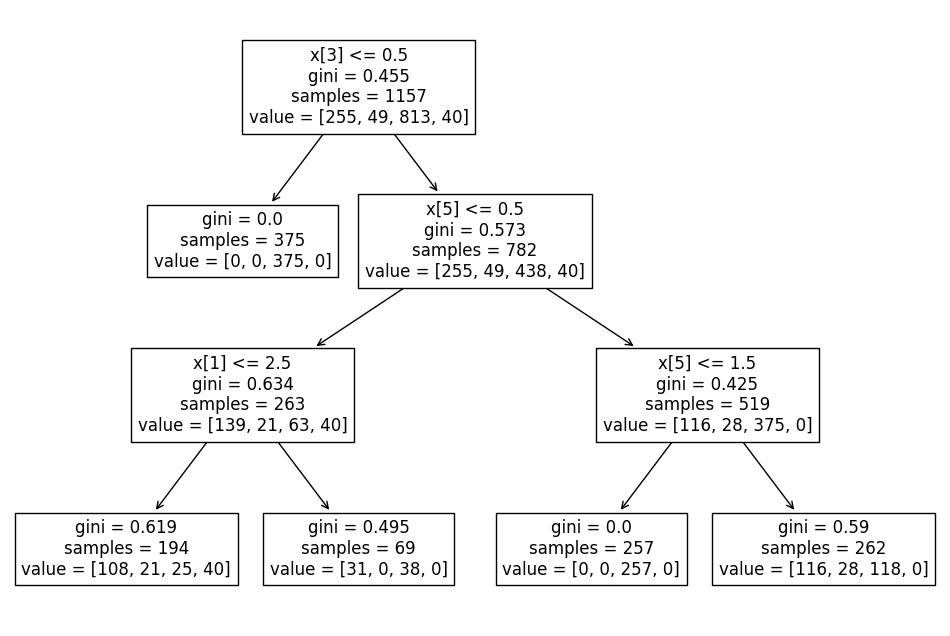

In [40]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train,y_train))

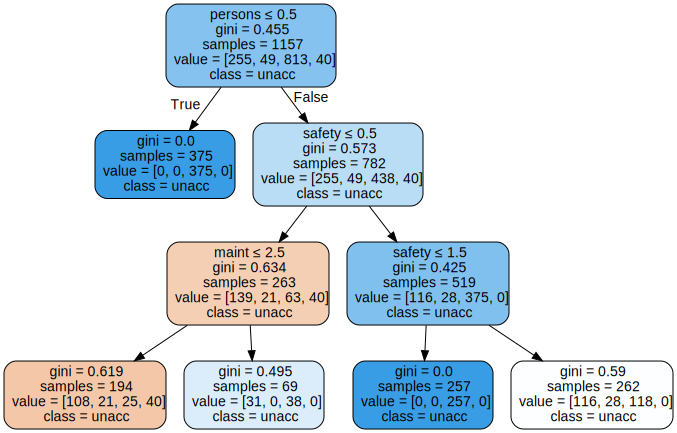

In [42]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=x_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [52]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [45]:
y_pred_en = clf_en.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy:{0:0.4f}'.format(accuracy_score(y_test,y_pred_en)))

Model accuracy score with criterion entropy:0.7653


In [48]:
y_pred_train_en = clf_en.predict(x_train)
y_pred_train_en

array(['unacc', 'unacc', 'acc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [49]:
print('Training-set accuracy score:{0:0.4f}'.format(accuracy_score(y_train,y_pred_train_en)))

Training-set accuracy score:0.7744


In [50]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Training set score: 0.7744
Test set score: 0.7653


[Text(0.375, 0.875, 'x[3] <= 0.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 375\nvalue = [0, 0, 375, 0]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\nentropy = 1.465\nsamples = 782\nvalue = [255, 49, 438, 40]'),
 Text(0.25, 0.375, 'x[1] <= 2.5\nentropy = 1.684\nsamples = 263\nvalue = [139, 21, 63, 40]'),
 Text(0.125, 0.125, 'entropy = 1.668\nsamples = 194\nvalue = [108, 21, 25, 40]'),
 Text(0.375, 0.125, 'entropy = 0.993\nsamples = 69\nvalue = [31, 0, 38, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\nentropy = 1.049\nsamples = 519\nvalue = [116, 28, 375, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 257\nvalue = [0, 0, 257, 0]'),
 Text(0.875, 0.125, 'entropy = 1.383\nsamples = 262\nvalue = [116, 28, 118, 0]')]

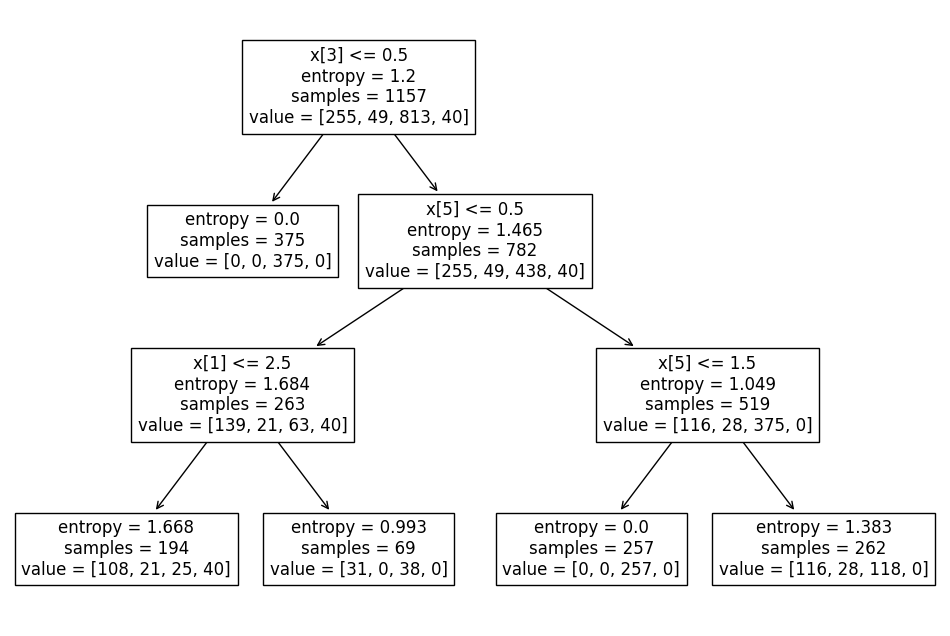

In [58]:

plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(x_train,y_train))

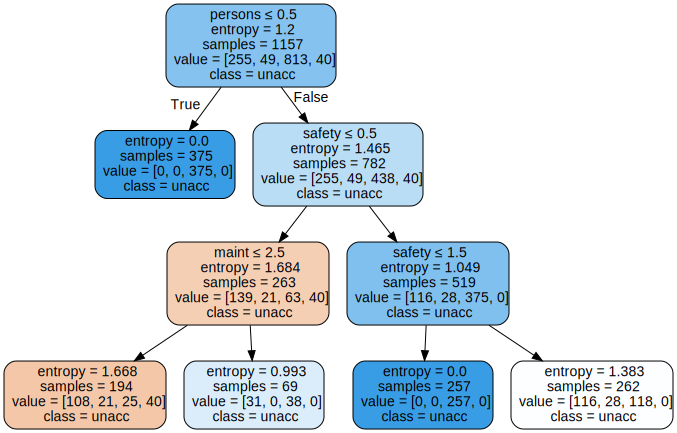

In [59]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=x_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [61]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_en)
print('Confusion_Matrix\n\n',cm)

Confusion_Matrix

 [[ 50   0  79   0]
 [  9   0  11   0]
 [ 10   0 387   0]
 [ 25   0   0   0]]


In [62]:
# Print the classiication report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred_en)
print('Classification report\n\n',cr)

Classification report

               precision    recall  f1-score   support

         acc       0.53      0.39      0.45       129
        good       0.00      0.00      0.00        20
       unacc       0.81      0.97      0.89       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.77       571
   macro avg       0.34      0.34      0.33       571
weighted avg       0.68      0.77      0.72       571



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
